# __Developing a Predictive Credit Risk Model to make data-driven lending decisions.__

## __Project Overview__

### __This project is focused on the development of a predictive credit risk model for SVI Bank Limited, aimed at enhancing the bank's ability to make data-driven lending decisions, particularly in the domain of subprime mortgages. The bank faces the challenge of assessing loan applications from individuals with poor or limited credit histories, making traditional credit scoring methods less reliable. Subprime mortgages, which are extended to high-risk borrowers, require a nuanced approach to balance risk and profitability.__
### __To address this, we propose the use of a classification model (logistic regression), to predict the likelihood of a loan's repayment status (good or bad) based on a range of financial variables captured at the time of the loan application. The objective is to build a robust, accurate model capable of identifying profitable loan applicants while minimizing the exposure to potential defaults.__
### __Given that SVI Bank wants the solution to consider both profitability and market expansion as key objectives. Maximizing profits involves accepting loans that have a high probability of repayment while expanding market share requires the bank to take on more risk by approving loans with lower repayment probabilities.__


### __In this project, we have utilized a dataset, which contains historical customer data of SVI Bank. The dataset includes metrics such as:__

- __TARGET:-__	Target = 1 (Defaulters), Target = O (Good Loans)
- __ID:-__	Customer ID
- __DerogCnt:-__	Number Public Derogatories
- __CollectCnt:-__	Collections
- __BanruptcyInd:-__	Bankruptcy Indicator
- __InqCnt06:-__	Inquiries 6 Months
- __InqTimeLast:-__	Time Since Last Inquiry
- __InqFinanceCnt24:-__	Finance Inquires 24 Months
- __TLTimeFirst:-__	Time Since First Trade Une
- __TLTimeLast:-__	Time Since Last Trade Line
- __TLCnt03:-__	Number Trade Unes Opened 3 Months
- __TLCnt12:-__	Number Trade Lines Opened 12 Months
- __TLCnt24:-__	Number Trade Unes Opened 24 Months
- __TLCnt:-__	Total Open Trade Unes
- __TLSum:-__	Total Balance All Trade Lines
- __TLMaxSum:-__	Total High Credit All Trade Lines
- __TLSatCnt:-__	Number Trade Lines Currently Satisfactory
- __TLDel60Cnt:-__	Number Trade Unes Currently 60 Days or Worse
- __TLBadCnt24:-__	Number Trade Unes Bad Debt 24 Months
- __TL75UtilCnt:-__	Number Trade I-Ines 75 pct Utilized
- __TL50UtilCnt:-__	Number Trade Lines 50 pct Utilized
- __TLBalHCPct:-__	Percent Trade Line Balance to High Credit
- __TLSatPct:-__	Percent Satisfactory to Total Trade Lines
- __TLDel3060Cnt24:-__	Number Trade Lines 30 or 60 Days 24 Months
- __TLDel90Cnt24:-__	Number Trade Unes 90+ 24 Months
- __TLDel60CntAll:-__	Number Trade Lines 60 Days or Worse Ever
- __TLOpenPct:-__	Percent Trade Lines Open
- __TLBadDerogCnt:-__	Bad Dept plus Public Derogatories
- __TLDel60Cnt24:-__	Number Trade Lines 60 Days or Worse 24 Months
- __TLOpen24Pct:-__	Percent Trade Unes Open 24 Months

### __Lets start with importing the required libraries.__

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## __Dataset Overview__

### __Lets load the dataset and have a quick overview into the dataset.__

In [2]:
df=pd.read_excel(r"D:\\PP\\Project1\\Portfolio\\File\\logisticRegression\\a_Dataset_CreditScoring.xlsx")
df

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,126441,0,0,0,2,0.0,2,199,10,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,126448,0,0,0,0,NaN,0,270,3,...,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,126465,1,1,0,8,0.0,5,234,4,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,126487,4,4,0,2,3.0,1,257,3,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000


### __Lets run a quick diagnosis on the dataset to understand the dataset in detail.__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

## __Data Preparation and Preprocessing__

In [69]:
print(df.isnull().sum())
print(df.duplicated().any())

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64
False


### __Lets remove the ID column as we do not need it for our model and also we can see that there are some columns with null values and it looks the numbers is not that big so lets remove those as well.__

In [5]:
clean_df=df.dropna()
#clean_df=df.fillna(df.mean())
clean_df=clean_df.drop('ID', axis=1)
clean_df

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,3,3,0,4,0.0,5,117,27,0,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,15,9,0,3,1.0,3,14,14,0,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,0,0,0,1,5.0,1,354,7,0,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,8,5,0,6,1.0,10,16,4,0,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,3,1,0,9,0.0,8,130,52,0,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,8,1.0,5,280,66,0,...,0.0,0.0709,0.3750,0,2,7,0.2500,2,2,0.0000
2995,0,0,0,0,2,0.0,2,199,10,0,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2997,0,1,1,0,8,0.0,5,234,4,0,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,4,4,0,2,3.0,1,257,3,1,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000


### __Lets check the mean and count of dependant variable.__

In [6]:
print(clean_df.TARGET.mean())
print(clean_df.TARGET.value_counts())

0.17265395894428154
TARGET
0    2257
1     471
Name: count, dtype: int64


### __Lets draw a scatterplot between the response variable (TARGET) and predictor variable.__

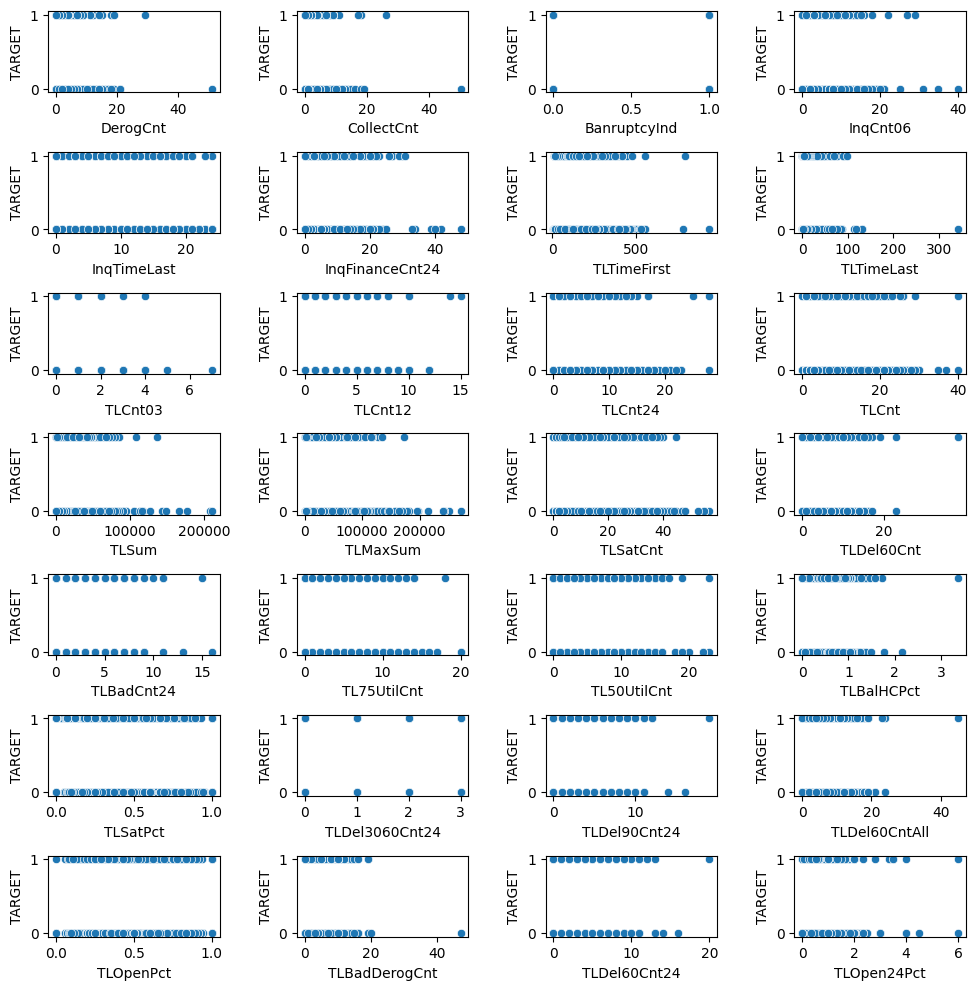

In [7]:
x=clean_df.drop('TARGET', axis=1)
y=clean_df['TARGET']
plt.figure(figsize=(10, 10))
for i, column in enumerate(x.columns):
    plt.subplot(7, 4, i + 1)  # Create subplots
    sns.scatterplot(x=column, y="TARGET", data=clean_df)
plt.tight_layout()
plt.show()    

## __Model training__

### __Lets split the dataset into training and test in 70:30.__ 

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)

### __Lets apply data normalization into our datset.__

In [9]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### __In this section, we are trying to train a logistic regression model using data points from our dataset using Scikit-Learn. This model will try to predict the response variable (prediction) of the test dataset, utilizing the relationship of predictor variables and response variable from our training dataset.__

In [10]:
lgm=LogisticRegression()
lgm.fit(x_train, y_train)

LogisticRegression()

### __Now lets test our model on test dataseet.__

In [11]:
prediction=lgm.predict(x_test)
confusionmatrix=confusion_matrix(y_test, prediction)
accuracy=(confusionmatrix[0,0]+confusionmatrix[1,1])/np.sum(confusionmatrix)
print("Confusion Matrix", confusionmatrix)
print("Accuracy", round(accuracy*100,2),"%")

Confusion Matrix [[660  23]
 [111  25]]
Accuracy 83.64 %


## __Decision Making__

### __To make decessions based on our models prediction we have few more things to do.__

In [71]:
prediction_probablity=lgm.predict_proba(x_test)
prediction_probablity=pd.DataFrame(prediction_probablity, columns=["Probablity_0", "Probablity_1"])
predicted_target=pd.DataFrame(lgm.predict(x_test), columns=["Predicted_TARGET"])
actual_output = pd.DataFrame(y_test.ravel(), columns=["Actual_output"])
print(prediction_probablity.shape, predicted_target.shape, actual_output.shape)

(819, 2) (819, 1) (819, 1)


In [34]:
output=pd.concat([prediction_probablity, predicted_target, actual_output], axis=1)
output.to_csv("Output_file.csv", sep=';', encoding="utf-8")

In [35]:
output.head()

,Probablity_0,Probablity_1,Predicted_TARGET,Actual_output
0,0.848145,0.151855,0,0
1,0.795578,0.204422,0,0
2,0.659115,0.340885,0,1
3,0.954486,0.045514,0,0
4,0.741598,0.258402,0,0


### __Now to make a decision on how our client should make their strategy so that they can have both profit and good market share, we apply some statistical logic to arrive at the final decision.__

In [40]:
output=output.sort_values(by='Probablity_0', ascending=False).reset_index()
decile_size=len(output)//9
output['decile']=(output.index//decile_size)+1
output

,level_0,index,Probablity_0,Probablity_1,Predicted_TARGET,Actual_output,decile
0,0,641,0.992421,0.007579,0,0,1
1,1,676,0.991712,0.008288,0,0,1
2,2,509,0.991584,0.008416,0,0,1
3,3,533,0.991539,0.008461,0,0,1
4,4,735,0.989220,0.010780,0,0,1
...,...,...,...,...,...,...,...
814,814,624,0.149487,0.850513,1,1,9
815,815,614,0.135537,0.864463,1,1,9
816,816,536,0.134829,0.865171,1,1,9
817,817,751,0.068857,0.931143,1,0,9


In [64]:
decile_met=output.decile.value_counts().to_frame()
decile_met['Min of Probablity_Good']=round(output.groupby('decile')['Probablity_0'].min()*100,2)
decile_met['Sum of Actual_output']=output.groupby('decile')['Actual_output'].sum()
decile_met['Count of good loans']=decile_met['count']-decile_met['Sum of Actual_output']
decile_met['Cumu. Count of good loans']=decile_met['Count of good loans'].cumsum()
decile_met['Cumu. Count of bad loans']=decile_met['Sum of Actual_output'].cumsum()
decile_met['% of Cumu. good loans']=decile_met['Cumu. Count of good loans']/decile_met['Cumu. Count of good loans'].max()*100
decile_met['% of Cumu. bad loans']=decile_met['Cumu. Count of bad loans']/decile_met['Cumu. Count of bad loans'].max()*100
decile_met['% of Cumu. bad loans avoided']=100-decile_met['% of Cumu. bad loans']
loss=500
profit=100
decile_met['Profit from the buisness']=(decile_met['Cumu. Count of good loans']*profit)-(decile_met['Cumu. Count of bad loans']*loss)
decile_met

,count,Min of Probablity_Good,Sum of Actual_output,Count of good loans,Cumu. Count of good loans,Cumu. Count of bad loans,% of Cumu. good loans,% of Cumu. bad loans,% of Cumu. bad loans avoided,Profit from the buisness
decile,,,,,,,,,,
1,91,96.44,3,88,88,3,12.884334,2.205882,97.794118,7300
2,91,94.49,1,90,178,4,26.061493,2.941176,97.058824,15800
3,91,92.50,10,81,259,14,37.920937,10.294118,89.705882,18900
4,91,89.97,9,82,341,23,49.926794,16.911765,83.088235,22600
5,91,86.55,7,84,425,30,62.225476,22.058824,77.941176,27500
6,91,82.22,12,79,504,42,73.792094,30.882353,69.117647,29400
7,91,74.57,17,74,578,59,84.626647,43.382353,56.617647,28300
8,91,61.22,29,62,640,88,93.704246,64.705882,35.294118,20000
9,91,1.09,48,43,683,136,100.000000,100.000000,0.000000,300


## __Conclusion__

### __Now, we have our final table and from this, we can come to some impactful conclusions for our client.__

- #### __Decile 1 represents the most reliable customer segment for businesses prioritizing a conservative approach to loan approvals. This group offers the highest likelihood of loan repayment with minimal risk.__

- #### __Using Decile 1 as the cutoff probability allows businesses to approve loans for 12.88% of their total good customers while effectively avoiding 97.79% of bad customers, ensuring a highly selective and risk-averse lending strategy.__

- #### __Decile 5 is the optimal point for maximizing profitability, with a cutoff probability of 86.55%. At this threshold, businesses approve only applications with a good loan probability above this value.__

- #### __Decile 6 offers a balanced approach, with a slightly lower cutoff probability of 82.22%. This allows businesses to maintain a focus on both market share and profitability, aligning with broader strategic goals.__

- #### __Moving down the table, increases the approval of good customers, enabling businesses to expand their market reach. But, this expansion comes with increased risk, as businesses are exposed to a higher proportion of bad customers.__


In [ ]:
df.describe()